### Naive Bayes Classifier for Digit Recognition (35%)

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline
import pandas as pd
# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
#from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
# Set the randomizer seed so results are the same each time.
np.random.seed(0)
from sklearn.metrics import accuracy_score
import random
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_openml(name='mnist_784',version=1)

X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))


X, Y = X.iloc[shuffle], Y[shuffle]
print('data shape: ', X.shape)
print('label shape:', Y.shape)



# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[60000:], Y[60000:]
dev_data, dev_labels = X[50000:59999], Y[50000:59999]
train_data, train_labels = X[:50000], Y[:50000]
mini_train_data, mini_train_labels = X[:1200], Y[:1200]



data shape:  (70000, 784)
label shape: (70000,)


### A. Create a 10x10 grid to visualize 10 examples of each digit.

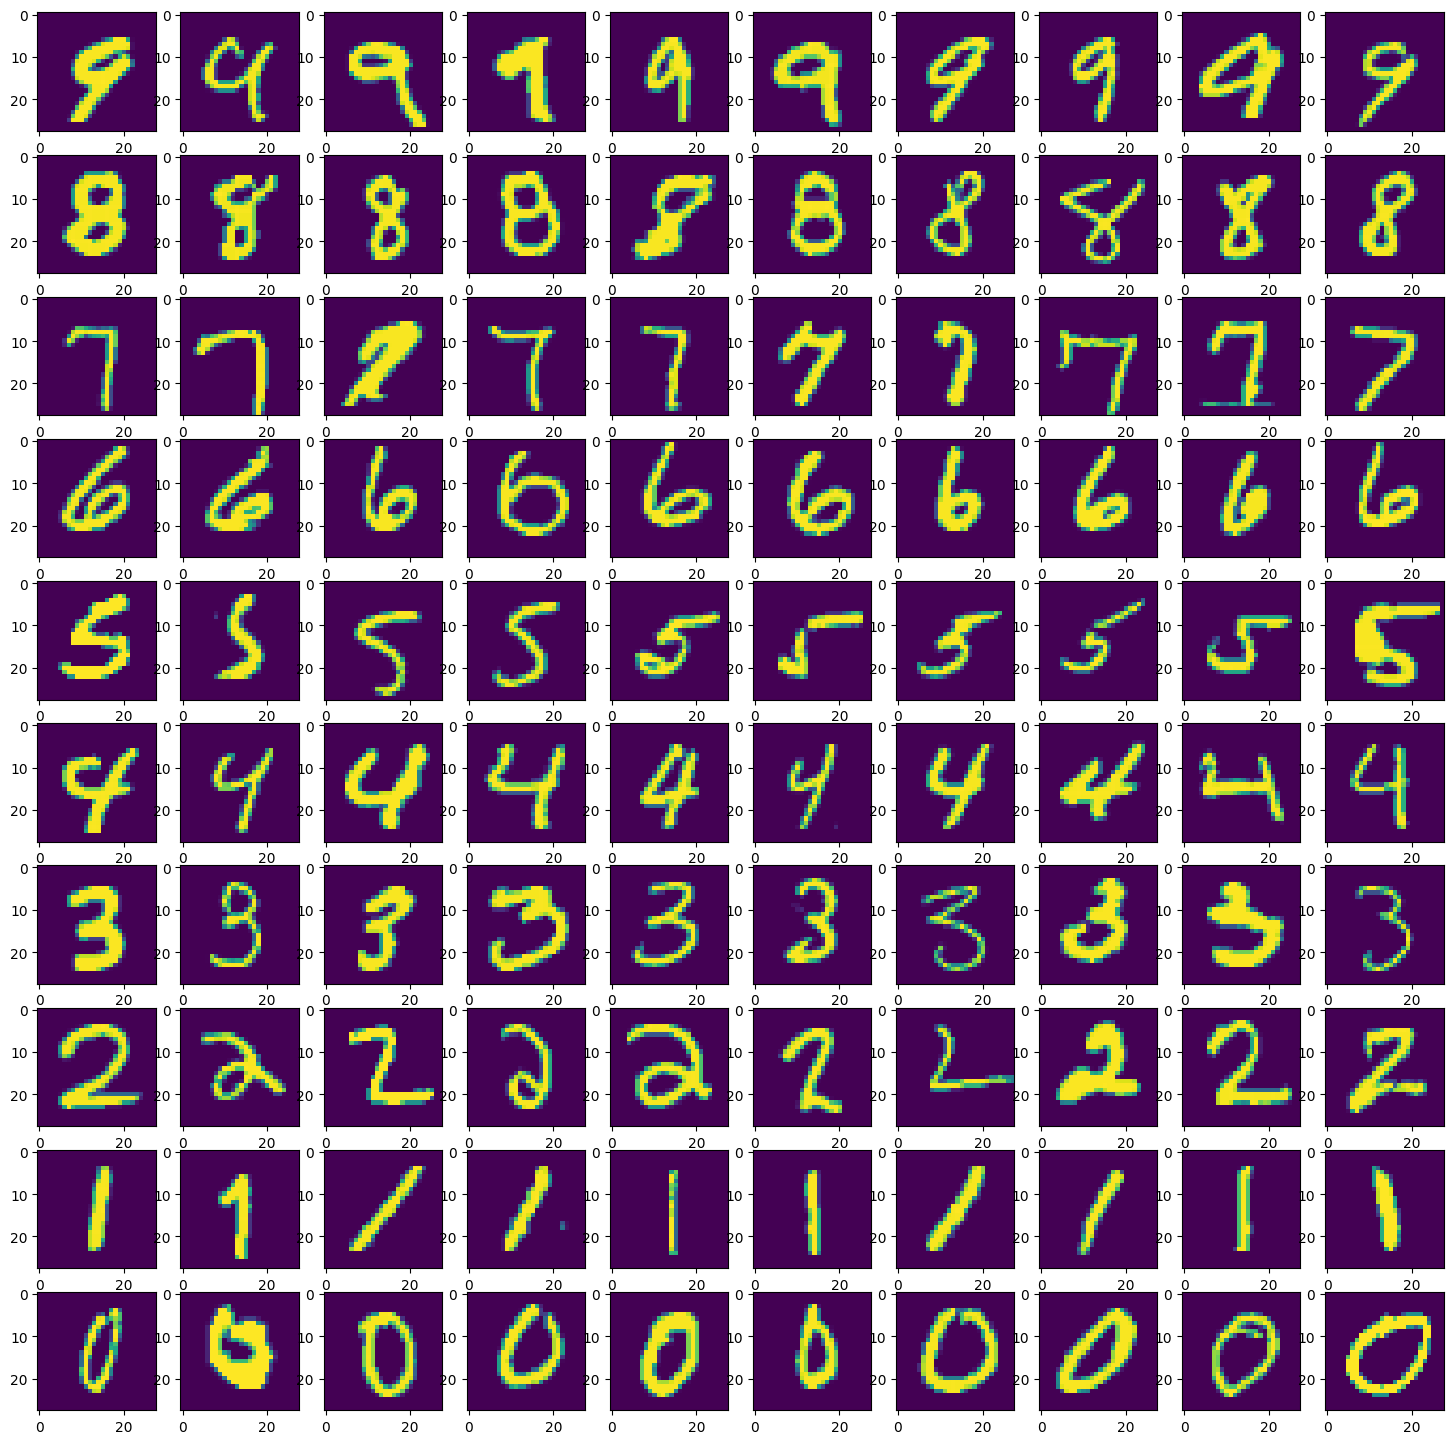

In [3]:
dataset = pd.DataFrame(mnist.data)
dataset['target'] = mnist.target

#define bins to set class
#sort descending
label_bins= {}
label_class = mnist.target.unique().to_list()
label_class.sort(reverse=True)

for label in label_class:
    label_dataset = pd.DataFrame(dataset[dataset.target == label])
    label_dataset.drop(columns=['target'], inplace=True)
    label_bins[label] = label_dataset.sample(n = 10).to_numpy() #using 10 bins
i = 0
plt.figure(figsize=(20,20))
for target in label_class:
    i = i + 1;
    for j in range(len(label_bins[target])):
        ax = plt.subplot2grid((len(label_class)+1,len(label_bins[target])+1), (i,j))
        ax.imshow(np.reshape(label_bins[target][j], (28, 28)))
plt.show()

### B.  Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?
### Note, the answers may vary depending on what thresholds you set.

In [4]:
binary_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.65,0.7,0.9]
binary_list

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 0.7, 0.9]

In [5]:
for i in binary_list:
    #define bernoulinb with binary number
    BNBclf = BernoulliNB(binarize=i)
    BNBclf.fit(train_data, train_labels)
    y_pred_dev = BNBclf.predict(dev_data)
    print("Threshold for binarizing of a sample features:",i,"| Accuracy: ", accuracy_score(dev_labels, y_pred_dev) * 100.0)

Threshold for binarizing of a sample features: 0.1 | Accuracy:  83.11831183118312
Threshold for binarizing of a sample features: 0.2 | Accuracy:  83.16831683168317
Threshold for binarizing of a sample features: 0.3 | Accuracy:  83.03830383038304
Threshold for binarizing of a sample features: 0.4 | Accuracy:  83.26832683268327
Threshold for binarizing of a sample features: 0.5 | Accuracy:  83.27832783278328
Threshold for binarizing of a sample features: 0.6 | Accuracy:  83.14831483148315
Threshold for binarizing of a sample features: 0.65 | Accuracy:  82.76827682768277
Threshold for binarizing of a sample features: 0.7 | Accuracy:  82.72827282728272
Threshold for binarizing of a sample features: 0.9 | Accuracy:  81.13811381138115


The accurate binary value is less than 0.7 because after that accuracy decreases

## MultinomialNB

In [6]:
def vectorize_split(val):
    if val >= 0.66:
      return 2.0
    elif val >= 0.33 and val <0.66:
      return 1.0
    elif val < 0.33 and val >= 0:
      return 0.0
    else:
      return val


X_train_1 =  pd.DataFrame(train_data)
X_test_1 =  pd.DataFrame(dev_data)   
vn = np.vectorize(vectorize_split)

for column in X_train_1.columns.to_list():
    cols_train = X_train_1[column].to_numpy()
    cols_test = X_test_1[column].to_numpy()
    result_train = vn(cols_train)
    result_test = vn(cols_test)
    X_train_1[column].update(pd.Series(result_train))
    X_test_1[column].update(pd.Series(result_test))

In [7]:
MNB = MultinomialNB(alpha=0.5)
MNB.fit(X_train_1, train_labels)
y_multi_pred = MNB.predict(dev_data)
print("Accuracy: ", round(accuracy_score(dev_labels, y_multi_pred)*100.0))

Accuracy:  65


This does not boost accuracy because vectorizer is used to convert labels into 0,1,2 (white, gray,black) because we are restricting the dataset to 3 labels. we are adding more randomness. 

In [8]:
# Multinomial Naive Bayes Classifier with all 10 labels
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

# Perform the predictions
clf.fit(train_data,train_labels)
# Perform the predictions
y_predicted = clf.predict(dev_data)
# Calculate the accuracy of the prediction
from sklearn.metrics import accuracy_score
print ("Accuracy = {0} %".format(accuracy_score(dev_labels, y_predicted)*100))
# Cross validate the scores
from sklearn.metrics import classification_report
print ("Classification Report \n {0}".format(classification_report(dev_labels, y_predicted, labels=range(0,10))))

Accuracy = 65.44654465446544 %
Classification Report 
               precision    recall  f1-score   support

           0       0.63      0.78      0.70       926
           1       0.63      0.84      0.72      1111
           2       0.73      0.68      0.70       997
           3       0.63      0.69      0.66      1005
           4       0.78      0.53      0.63       994
           5       0.67      0.48      0.56       951
           6       0.69      0.74      0.71       974
           7       0.66      0.74      0.70      1087
           8       0.72      0.38      0.50       977
           9       0.52      0.64      0.57       977

   micro avg       0.65      0.65      0.65      9999
   macro avg       0.67      0.65      0.65      9999
weighted avg       0.67      0.65      0.65      9999



accuracy is better than multionomial model with 3 labels because we are feeding in with lots of labels and information which model can segregate labels to identify numbers

### C. Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Could you explain why?

In [9]:
GNB = GaussianNB(var_smoothing=100.0)
GNB.fit(dev_data, dev_labels)
y_gaus_pred = GNB.predict(test_data)
print("Accuracy of Gaussian NB: ", accuracy_score(test_labels, y_gaus_pred)*100.0)

Accuracy of Gaussian NB:  52.44


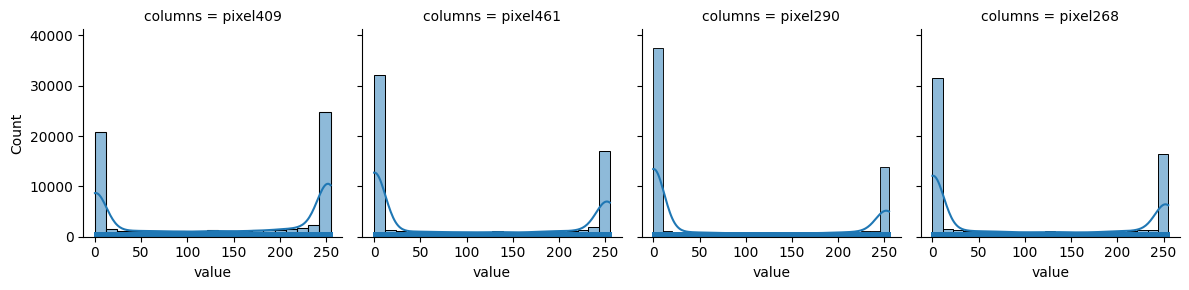

In [10]:
warnings.filterwarnings("ignore")
df = X[random.sample(X.columns.to_list(), 4)]
df = df * 255.0
dfm = df.melt(var_name='columns')
g = sns.FacetGrid(dfm, col='columns')

g = (g.map(sns.histplot, 'value',kde=True))
g = (g.map(sns.rugplot, 'value'))

dataset's has long tailed distribution, the GaussianNB model's accuracy is very poor.